## Research Report - Body Dimensions (bdims.csv)

## Reference

Heinz, G., Peterson, L. J., Johnson, R. W., &amp; Kerk, C. J. (2017). Exploring relationships in body dimensions. Journal of Statistics Education, 11(2). https://doi.org/10.1080/10691898.2003.11910711 

### Imports 

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import t

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

## 1. Introduction
## Title - Body Dimension Data Analysis


### Motivation

Some people are tall, some are short, some are fat, and some are thin. There are a lot of differences between our bodies and investigating these differences sometimes is very interesting. We were thinking if there would be some kind of associations between the figures of girths and diameters of different body parts of males and females. Therefore, we choose this data set that has data on different body parts, which can help us investigate the correspondence between body build and girths in men and women of different ages.


### Dataset Brief

This dataset consists of data from 247 males and 260 females, all taken in California. All the participants are physically active and do exercise several hours per week, in which most of them are in their twenties and early thirties, with a small group of older men and women. Thus, concluding from the statement above, the population of our dataset is physically active people in California. 

The author also stated that "the dataset does not constitute a random sample from a well-defined population" (Heinz et al., 2017), which means the dataset is not random.

See the “Variables” part for the detail of the data.

### Variables

**Please note**: We modified the variable names of the original dataset, by changing all the dots (".") to underscores ("_"). For example, **bia.di** is replaced by **bia_di**. We made the change because some Python functions do not recognize the variable name with a dot in it.

- **bia_di**: A numerical vector, respondent's biacromial diameter in centimeters.
- **bii_di**: A numerical vector, respondent's biiliac diameter (pelvic breadth) in centimeters.
- **bit_di**: A numerical vector, respondent's bitrochanteric diameter in centimeters.
- **che_de**: A numerical vector, respondent's chest depth in centimeters, measured between spine and sternum at nipple level, mid-expiration.
- **che_di**: A numerical vector, respondent's chest diameter in centimeters, measured at nipple level, mid-expiration.
- **elb_di**: A numerical vector, respondent's elbow diameter in centimeters, measured as sum of two elbows.
- **wri_di**: A numerical vector, respondent's wrist diameter in centimeters, measured as sum of two wrists.
- **kne_di**: A numerical vector, respondent's knee diameter in centimeters, measured as sum of two knees.
- **ank_di**: A numerical vector, respondent's ankle diameter in centimeters, measured as sum of two ankles.
- **sho_gi**: A numerical vector, respondent's shoulder girth in centimeters, measured over deltoid muscles.
- **che_gi**: A numerical vector, respondent's chest girth in centimeters, measured at nipple line in males and just above breast tissue in females, mid-expiration.
- **wai_gi**: A numerical vector, respondent's waist girth in centimeters, measured at the narrowest part of torso below the rib cage as average of contracted and relaxed position.
- **nav_gi**: A numerical vector, respondent's navel (abdominal) girth in centimeters, measured at umbilicus and iliac crest using iliac crest as a landmark.
- **hip_gi**: A numerical vector, respondent's hip girth in centimeters, measured at at level of bitrochanteric diameter.
- **thi_gi**: A numerical vector, respondent's thigh girth in centimeters, measured below gluteal fold as the average of right and left girths.
- **bic_gi**: A numerical vector, respondent's bicep girth in centimeters, measured when flexed as the average of right and left girths.
- **for_gi**: A numerical vector, respondent's forearm girth in centimeters, measured when extended, palm up as the average of right and left girths.
- **kne_gi**: A numerical vector, respondent's knee diameter in centimeters, measured as sum of two knees.
- **cal_gi**: A numerical vector, respondent's calf maximum girth in centimeters, measured as average of right and left girths.
- **ank_gi**: A numerical vector, respondent's ankle minimum girth in centimeters, measured as average of right and left girths.
- **wri_gi**: A numerical vector, respondent's wrist minimum girth in centimeters, measured as average of right and left girths.
- **age**: A numerical vector, respondent's age in years.
- **wgt**: A numerical vector, respondent's weight in kilograms.
- **hgt**: A numerical vector, respondent's height in centimeters.
- **sex**: A categorical vector, 1 if the respondent is male, 0 if female.


### Research Questions

**Descriptive Analytics Research Question** - What is the tendency between Wrist Diameter and Ankle Diameter under the influence of Gender?

**Inference Research Question** - What is the association between the mean wrist diameter for males and females?

**Linear Regression Research Question** - Is there a linear relationship between Wrist Diameter and Gender, Age, Thigh Girth, and Chest Diameter in the sample? What about in the population?

**Logistic Regression Research Question** - Is there a linear relationship between the log-odds of the of Gender and Wrist Diameter, Age, Thigh Girth, and Chest Diameter in the sample? What about in the population? What explanatory variables should we include in the model to build a parsimonious model?


### Dataset

In [46]:
body_dimensions = pd.read_csv('bdims.csv')
body_dimensions.isna().sum()
# There is no unique or missing values in this dataframe

bia_di    0
bii_di    0
bit_di    0
che_de    0
che_di    0
elb_di    0
wri_di    0
kne_di    0
ank_di    0
sho_gi    0
che_gi    0
wai_gi    0
nav_gi    0
hip_gi    0
thi_gi    0
bic_gi    0
for_gi    0
kne_gi    0
cal_gi    0
ank_gi    0
wri_gi    0
age       0
wgt       0
hgt       0
sex       0
dtype: int64

In [47]:
body_dimensions.sample(10)
# 10 random samples for this dataframe

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
26,45.4,31.8,35.2,20.2,32.3,14.6,10.5,20.2,15.3,115.0,...,35.5,28.5,38.0,40.0,23.5,16.7,21,82.8,180.3,1
375,35.1,23.4,30.6,16.2,26.8,12.1,9.4,16.1,12.2,98.2,...,26.6,23.2,35.2,35.0,21.0,14.8,23,53.8,164.0,0
394,35.4,27.0,29.0,17.8,25.0,11.6,9.2,18.2,12.1,98.0,...,27.2,23.2,35.6,30.5,20.1,14.6,32,56.0,157.5,0
153,39.4,29.7,33.1,22.3,31.5,15.6,12.0,19.5,14.8,119.0,...,34.0,28.4,38.0,37.0,22.5,17.4,30,80.9,182.9,1
407,36.7,28.0,31.7,17.3,27.3,13.1,10.6,18.4,13.4,99.0,...,26.6,22.8,32.5,34.6,21.2,14.1,27,55.9,170.2,0
398,36.9,31.1,33.8,16.8,26.6,13.0,9.8,18.4,13.8,98.2,...,26.4,23.1,34.6,32.3,20.4,14.7,40,56.8,168.9,0
322,36.0,28.6,32.0,17.5,24.1,12.8,9.8,18.7,13.8,92.2,...,24.7,21.7,37.4,35.5,21.0,15.0,52,55.7,164.0,0
279,39.1,29.7,33.7,20.1,29.5,13.2,10.0,20.3,13.6,114.0,...,31.6,26.6,39.6,38.9,23.3,15.9,22,83.0,176.5,0
247,37.6,25.0,31.3,16.2,24.9,11.2,9.2,17.0,12.3,95.0,...,24.3,20.5,32.0,32.2,21.0,13.5,22,51.6,161.2,0
285,36.0,28.0,30.8,17.3,25.9,12.9,9.8,17.8,13.8,100.1,...,31.0,24.9,35.5,38.0,21.5,15.3,19,67.9,161.3,0


In [48]:
body_dimensions.shape

(507, 25)

**There are 507 rows and 25 columns in the original dataframe.**

We split the data frame into the female version and male version respectively

In [49]:
body_dimensions_female = body_dimensions[body_dimensions['sex'] == 0]
body_dimensions_female.sample(10)
# Dataframe for females

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
270,42.6,31.8,34.8,19.9,30.4,12.5,11.0,21.0,14.2,117.1,...,34.4,28.3,40.1,40.0,24.2,17.6,29,87.8,176.5,0
385,37.1,25.0,29.3,17.1,28.1,13.0,10.9,17.5,13.0,108.5,...,30.1,25.2,35.8,35.0,21.7,16.0,19,62.2,167.1,0
303,33.8,29.7,32.4,17.3,25.4,13.4,9.6,18.4,13.4,94.5,...,26.0,22.6,35.9,32.5,19.7,14.6,21,60.7,180.3,0
432,38.3,30.8,35.6,17.0,26.8,13.6,10.4,19.0,13.6,102.3,...,29.3,25.0,35.6,36.6,22.5,16.4,24,65.5,175.3,0
382,36.4,27.7,29.8,17.0,25.0,11.2,9.0,16.9,12.2,94.0,...,25.0,22.2,31.6,31.6,18.8,14.2,23,46.4,158.2,0
292,33.3,29.2,32.0,14.8,25.9,12.6,10.4,18.4,13.0,98.7,...,27.7,24.5,33.1,35.4,21.2,15.7,19,58.3,167.6,0
394,35.4,27.0,29.0,17.8,25.0,11.6,9.2,18.2,12.1,98.0,...,27.2,23.2,35.6,30.5,20.1,14.6,32,56.0,157.5,0
472,35.1,26.6,29.2,17.0,24.4,11.8,9.4,17.0,12.2,94.4,...,28.8,24.7,33.0,34.6,21.7,15.8,32,55.4,160.0,0
358,40.0,31.0,35.8,21.3,33.2,14.1,12.2,24.3,12.9,129.5,...,40.3,30.8,45.6,45.0,25.8,18.2,34,105.2,172.7,0
398,36.9,31.1,33.8,16.8,26.6,13.0,9.8,18.4,13.8,98.2,...,26.4,23.1,34.6,32.3,20.4,14.7,40,56.8,168.9,0


In [50]:
body_dimensions_female.shape

(260, 25)

**There are 260 rows and 25 columns in the female dataframe.**

In [51]:
body_dimensions_male = body_dimensions[body_dimensions['sex'] == 1]
body_dimensions_male.sample(10)
# Dataframe for males

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
24,44.8,27.8,32.2,18.3,31.5,15.2,11.6,19.4,14.7,120.6,...,39.4,31.9,38.5,41.2,22.8,18.2,26,81.8,173.5,1
113,41.1,31.7,34.2,22.8,34.0,13.8,11.8,19.4,15.4,122.6,...,38.6,30.3,39.5,39.4,25.6,18.3,38,88.6,174.0,1
95,40.4,28.6,31.4,19.8,27.6,13.9,10.1,20.0,13.4,108.3,...,31.2,26.2,36.8,37.7,22.7,16.2,38,68.4,176.5,1
54,37.6,26.6,29.9,17.3,25.6,12.8,10.0,17.0,13.0,103.3,...,30.5,24.8,31.1,30.5,19.0,15.0,24,55.2,164.1,1
112,37.6,24.4,28.3,17.7,24.7,12.9,10.8,18.0,14.3,109.1,...,36.3,28.9,34.5,33.5,23.0,17.1,25,65.0,165.1,1
167,39.6,28.7,32.0,20.2,32.9,14.3,11.5,19.6,15.1,124.7,...,39.0,29.8,36.8,36.0,21.6,17.3,24,81.8,177.8,1
98,44.2,27.9,32.0,21.6,32.9,14.3,11.0,21.1,14.9,115.0,...,34.6,27.9,38.0,39.4,23.2,17.0,24,84.5,179.8,1
140,43.6,28.0,32.4,27.5,33.5,14.6,11.7,21.4,15.1,128.8,...,37.1,30.0,41.8,39.6,24.7,18.2,22,108.6,190.5,1
104,40.1,19.4,28.0,17.1,26.8,13.0,10.6,16.9,12.6,104.5,...,27.0,23.6,34.0,34.5,20.9,16.0,20,55.5,168.9,1
151,38.7,26.1,29.2,18.2,24.9,13.6,10.4,17.6,14.2,104.3,...,29.8,24.8,32.6,33.1,22.1,16.3,29,63.6,177.8,1


In [52]:
body_dimensions_male.shape

(247, 25)

**There are 247 rows and 25 columns in the male dataframe.**

______
<br/><br/>

## 2. Descriptive Analytics Research Question Set

### What is the relationship between Wrist Diameter and Ankle Diameter under the influence of Gender?

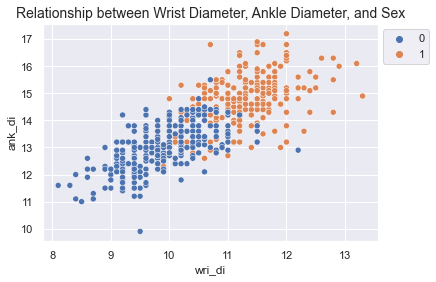

In [53]:
sns.scatterplot(x='wri_di', y='ank_di', hue='sex', data=body_dimensions)
plt.title('Relationship between Wrist Diameter, Ankle Diameter, and Sex', fontsize = 14)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Summary Statistics:
#### Wrist diameters (for females and males respectively):

In [54]:
body_dimensions_female['wri_di'].describe()

count    260.000000
mean       9.874231
std        0.661627
min        8.100000
25%        9.400000
50%        9.800000
75%       10.400000
max       12.200000
Name: wri_di, dtype: float64

In [55]:
body_dimensions_male['wri_di'].describe()

count    247.000000
mean      11.246154
std        0.635897
min        9.800000
25%       10.800000
50%       11.200000
75%       11.650000
max       13.300000
Name: wri_di, dtype: float64

#### Ankle diameter (for females and males respectively):

In [56]:
body_dimensions_female['ank_di'].describe()

count    260.000000
mean      13.026538
std        0.866063
min        9.900000
25%       12.400000
50%       13.000000
75%       13.725000
max       15.500000
Name: ank_di, dtype: float64

In [57]:
body_dimensions_male['ank_di'].describe()

count    247.000000
mean      14.744130
std        0.944236
min       12.300000
25%       14.200000
50%       14.800000
75%       15.300000
max       17.200000
Name: ank_di, dtype: float64

Both the scatterplot and the summary statistics show that there is approximately a linear relationship between wrist diameter and ankle diameter. Besides, both the wrist diameter and ankle diameter for males are bigger than that for females shown from the graph.

### Visulization - Boxplots and Violinplots

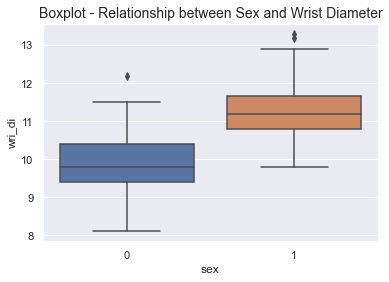

In [58]:
sns.boxplot(x='sex', y='wri_di', data=body_dimensions) 
plt.title('Boxplot - Relationship between Sex and Wrist Diameter', fontsize=14) 
plt.show()

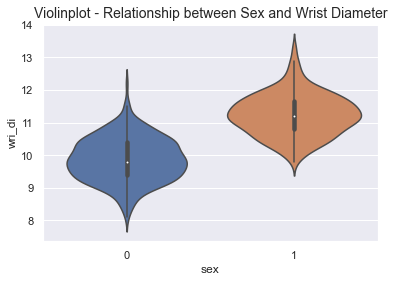

In [59]:
sns.violinplot(x="sex", y='wri_di', data=body_dimensions) 
plt.title('Violinplot - Relationship between Sex and Wrist Diameter', fontsize=14) 
plt.show()

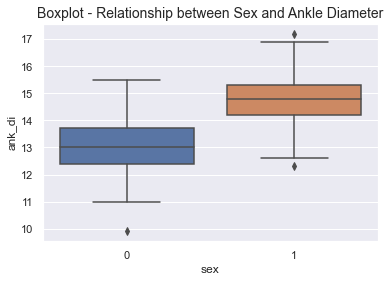

In [60]:
sns.boxplot(x='sex', y='ank_di', data=body_dimensions) 
plt.title('Boxplot - Relationship between Sex and Ankle Diameter', fontsize=14) 
plt.show()

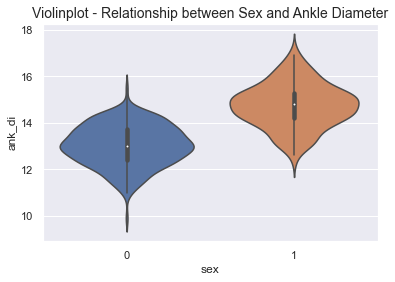

In [61]:
sns.violinplot(x='sex', y='ank_di', data=body_dimensions) 
plt.title('Violinplot - Relationship between Sex and Ankle Diameter', fontsize=14) 
plt.show()

1. Measures of Center: the median Wrist Diameter and Ankle Diameter are both larger for the male group than the female group;

2. Measures of Spread: the Wrist Diameter and Ankle Diameter IQR range of the female group is larger than the male group;

3. Distribution Shapes: the distributions of the female group look slightly unimodal both for Wrist Diameter and Ankle Diameter;

4. Outliers: the amount of outliers for males is larger than that for females in both wrist and ankle diameters.

______
<br/><br/>

## 3. Inference Research Question Set
### What is the association between the mean wrist diameter for males and females?

### Hypothesis - significan level 0.05 ($\alpha$ = 0.05)

H0: The mean wrist diameter of males = the mean wrist diameter of females in the population 

Ha: The mean wrist diameter of males != the mean wrist diameter of females in the population

### Condition:

1. The sample for males is randomly sampled

2. n_male = 24 < 10% N_male (24.7)

3. population distribution of male wrist diameter is approximately normal (shown from the graph below)

5. The sample for females is randomly sampled

6. n_female = 24 < 10% N_female (26)

7. population distribution of female wrist diameter is approximately normal (shown from the graph below)

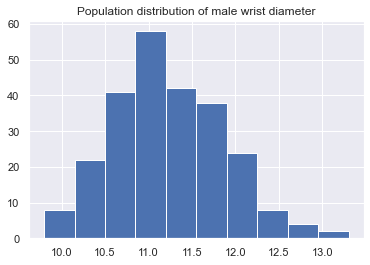

In [62]:
body_dimensions_male['wri_di'].hist()
plt.title('Population distribution of male wrist diameter')
plt.show()

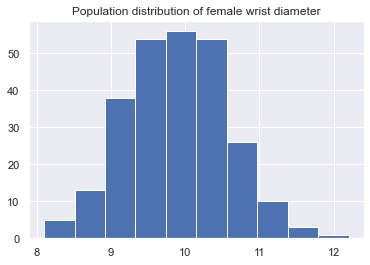

In [63]:
body_dimensions_female['wri_di'].hist()
plt.title('Population distribution of female wrist diameter')
plt.show()

In [90]:
df_male_sample = body_dimensions_male.sample(24)
df_female_sample = body_dimensions_female.sample(24)

In [91]:
male_mean = df_male_sample['wri_di'].mean()
male_std = df_male_sample['wri_di'].std()

female_mean = df_female_sample['wri_di'].mean()
female_std = df_female_sample['wri_di'].std()

point_estimate = male_mean - female_mean
std = np.sqrt((male_std ** 2)/24 + (female_std ** 2)/24)
q3_test_stat = (point_estimate - 0)/std
q3_p_value = 2 * (1 - t.cdf(np.abs(q3_test_stat), df = 23))

print(f'The p-value is {q3_p_value}.')

The p-value is 2.4773118001419903e-08.


### Conclusion

At the 5% significance level, since the p-value is 2.4773118001419903e-08 which is smaller than 0.05, the evidence is sufficient to reject the null hypothesis and conclude that the mean wrist diameter of males does not equal the mean wrist diameter of females in the target population.

To answer our research question, our conclusion suggests that there is a difference between the mean wrist diameter for males and females.

______
<br/><br/>

## 4. Linear Regression Research Question Set

### Is there a linear relationship between Wrist Diameter and Gender, Age, Thigh Girth, and Chest Diameter in the sample? What about in the population?

In [66]:
results1 = smf.ols("wri_di ~ sex + age + thi_gi + che_di", data = body_dimensions).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wri_di   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     223.2
Date:                Tue, 03 May 2022   Prob (F-statistic):          6.49e-110
Time:                        20:39:19   Log-Likelihood:                -430.82
No. Observations:                 507   AIC:                             871.6
Df Residuals:                     502   BIC:                             892.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1443      0.386     13.341      0.000       4.387       5.902
sex            0.9382      0.079     11.831      0.000       0.782       1.094
age            0.0071      0.003      2.619      0.009       0.002       0.012
thi_gi         0.0279      0.007      4.168      0.000       0.015       0.041
che_di         0.1124      0.015      7.311      0.000       0.082       0.143
==============================================================================
Omnibus:                        2.460   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.404
Skew:                           0.169   Prob(JB):                        0.301
Kurtosis:                       2.996   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression Equation:
Shown from the table above:

Wrist Diameter = 5.1443 + 0.9382*Gender + 0.0071*Age + 0.0279*Thigh Girth + 0.1124*Chest Diameter

### Condition:

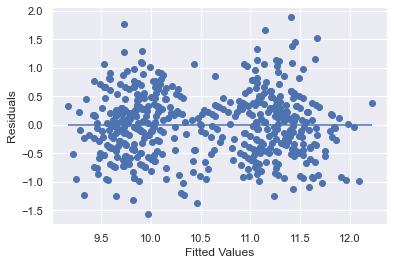

In [67]:
plt.scatter(results1.fittedvalues, results1.resid)
plt.hlines(y=0, xmin = np.min(results1.fittedvalues), xmax = np.max(results1.fittedvalues))
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

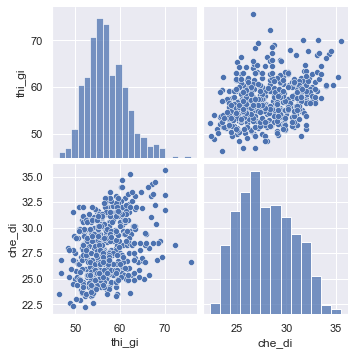

In [68]:
sns.pairplot(body_dimensions[["thi_gi","che_di"]])
plt.show()

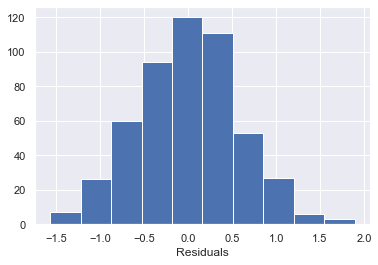

In [69]:
plt.hist(results1.resid)
plt.xlabel('Residuals') 
plt.show()

1. Linearity Condition, met: because the distribution of points in the plot above are roughly evenly distributed above and below the line as we move from left to right, we can say the linearity condition is met;


2. Constant Variability of Residuals Condition, met: because the y‑axis spread of points in the plot below do not change as moving from left to right, we can say that this condition is met;


3. Normality of Residuals Condition, met: because the histogram of residuals normal and, the assumption that the residuals are normally distributed is met;


4. Independence of Residuals Condition, not met: the dataframe is not random;


5. Multicollinearity Condition, met: there is no obvious linear relationship between the explanatory variables Chest Diameter and Thigh Girth. 

In [70]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wri_di   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     223.2
Date:                Tue, 03 May 2022   Prob (F-statistic):          6.49e-110
Time:                        20:39:20   Log-Likelihood:                -430.82
No. Observations:                 507   AIC:                             871.6
Df Residuals:                     502   BIC:                             892.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1443      0.386     13.341      0.000       4.387       5.902
sex            0.9382      0.079     11.831      0.000       0.782       1.094
age            0.0071      0.003      2.619      0.009       0.002       0.012
thi_gi         0.0279      0.007      4.168      0.000       0.015       0.041
che_di         0.1124      0.015      7.311      0.000       0.082       0.143
==============================================================================
Omnibus:                        2.460   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                2.404
Skew:                           0.169   Prob(JB):                        0.301
Kurtosis:                       2.996   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Shown from the table, r-squared = 0.640, which means 64% of the variability in our response variable is explained by this model in the dataset, a relatively high figure.

### Hypothesis - significan level 0.05 ($\alpha$ = 0.05)

H0: ${\beta{Gender}}$ =  ${\beta{Age}}$ = ${\beta{thigh}}$ = ${\beta{chest}}$ = 0 in the model

Ha: at lease one ${\beta}$ != 0 in the model

Shown from the table again, Prob (F-statistic) = 6.49e-110 

### Conclusion: 

Since our Significance of Regression F test p value (6.49e-110) < alpha value(0.05), we reject the null hypothesis and conclude that none of the slope is zero in the model.

______
<br/><br/>

## 5. Logistic Regression Research Question Set

### Is there a linear relationship between the log-odds of Gender and Wrist Diameter, Age, Thigh Girth, and Chest Diameter in the sample? What about in the population? What explanatory variables should we include in the model to build a parsimonious model?

In [71]:
body_dimensions_train, body_dimensions_test = train_test_split(body_dimensions, test_size = 0.2, random_state = 207)

In [72]:
body_dimensions_train.sample(10)
# Training Dataset

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
71,41.8,28.5,31.6,21.6,31.5,13.3,10.3,18.9,14.3,114.5,...,31.0,26.0,36.4,35.6,21.6,16.6,40,78.9,181.6,1
176,42.5,31.3,33.1,19.4,32.0,14.8,11.3,20.1,15.5,117.5,...,33.3,27.7,37.1,37.4,22.6,17.1,37,85.9,188.0,1
111,43.6,30.2,32.4,21.8,33.1,15.2,11.3,19.8,15.2,125.2,...,36.3,28.0,38.3,34.7,23.0,16.1,27,86.4,186.7,1
135,41.5,30.6,35.8,21.1,28.0,15.0,11.8,21.0,15.6,112.8,...,31.1,27.0,37.7,36.8,24.6,18.4,62,76.4,185.4,1
409,37.8,28.0,32.0,16.8,28.3,12.7,9.8,18.1,13.2,105.6,...,31.5,24.8,37.2,35.4,20.3,14.6,24,69.5,172.7,0
279,39.1,29.7,33.7,20.1,29.5,13.2,10.0,20.3,13.6,114.0,...,31.6,26.6,39.6,38.9,23.3,15.9,22,83.0,176.5,0
433,32.9,20.9,28.5,19.0,23.0,12.2,9.1,16.0,12.7,93.1,...,26.9,22.5,31.7,30.7,20.5,15.2,29,48.6,157.5,0
269,37.0,27.9,30.8,15.1,26.8,13.2,8.9,18.1,12.3,96.2,...,25.9,23.2,34.3,30.9,19.4,14.5,24,57.2,166.8,0
164,41.1,29.2,31.5,19.7,29.9,14.8,11.0,18.0,15.0,111.1,...,35.0,28.4,35.5,35.0,21.0,16.6,24,65.9,170.2,1
92,41.2,27.1,29.8,20.1,31.0,12.9,11.6,18.8,13.5,116.0,...,33.0,28.0,35.1,35.2,21.1,16.3,26,70.5,165.1,1


In [73]:
body_dimensions_test.sample(10)
# Testing Dataset

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
478,37.8,29.0,32.4,20.6,28.5,12.7,9.1,18.2,13.2,110.3,...,29.9,24.9,38.7,36.3,21.3,15.5,28,72.3,167.6,0
47,43.6,33.1,33.5,21.6,33.1,15.6,12.0,20.7,16.5,128.1,...,40.2,32.4,39.2,40.1,25.7,17.7,20,94.1,177.2,1
498,34.7,29.4,33.5,17.7,25.4,12.4,10.8,20.2,12.8,100.2,...,36.9,29.0,40.3,37.9,24.6,16.4,34,75.5,160.0,0
439,34.9,27.3,32.2,17.7,25.4,12.6,9.0,17.4,12.2,87.0,...,23.1,21.0,35.5,36.4,20.3,13.0,37,53.9,162.6,0
289,34.9,28.0,30.8,15.6,24.2,11.2,9.2,17.9,13.2,96.0,...,26.3,23.0,32.3,30.0,18.8,14.3,20,54.5,167.6,0
10,40.3,29.0,33.0,20.1,30.3,13.4,10.4,19.4,14.5,117.1,...,34.6,27.9,38.9,40.1,23.2,16.2,23,76.6,180.0,1
309,35.0,27.0,33.0,19.3,25.0,11.5,9.9,17.1,13.0,94.5,...,28.0,23.0,34.0,34.2,20.6,15.0,25,62.0,163.0,0
36,41.1,27.8,31.4,19.0,31.5,14.5,11.9,18.5,13.0,114.8,...,31.0,26.1,36.3,35.1,21.0,17.0,22,67.2,182.0,1
435,37.8,32.0,33.8,16.8,26.6,13.4,10.4,18.8,13.4,105.0,...,28.4,24.3,34.7,34.5,20.9,14.9,34,63.6,167.6,0
125,39.6,28.7,32.4,18.2,28.3,15.2,11.8,19.6,14.8,119.4,...,35.3,28.7,39.3,35.9,23.0,17.4,29,83.6,188.0,1


### Backward Elimination:
The lower the AIC, the better the model.

In [74]:
mod_full = smf.logit(formula = 'sex ~ wri_di + age + thi_gi + che_di', data = body_dimensions_train).fit()
print('Iteration 1: AIC of the current model', mod_full.aic)

Optimization terminated successfully.
         Current function value: 0.186686
         Iterations 9
Iteration 1: AIC of the current model 161.21558041938258


In [75]:
mod_wri = smf.logit(formula = 'sex ~ age + thi_gi + che_di', data = body_dimensions_train).fit()
print('Iteration 2: AIC of the current model (without Wri.di)', mod_wri.aic)

Optimization terminated successfully.
         Current function value: 0.312793
         Iterations 7
Iteration 2: AIC of the current model (without Wri.di) 261.3625714299693


In [76]:
mod_age = smf.logit(formula = 'sex ~ wri_di + thi_gi + che_di', data = body_dimensions_train).fit()
print('Iteration 3: AIC of the current model (without Age)', mod_age.aic)

Optimization terminated successfully.
         Current function value: 0.189041
         Iterations 9
Iteration 3: AIC of the current model (without Age) 161.1228581019434


In [77]:
mod_thi = smf.logit(formula = 'sex ~ wri_di + age + che_di', data = body_dimensions_train).fit()
print('Iteration 4: AIC of the current model (without thi.gi)', mod_thi.aic)

Optimization terminated successfully.
         Current function value: 0.275084
         Iterations 8
Iteration 4: AIC of the current model (without thi.gi) 230.81830293810276


In [78]:
mod_che = smf.logit(formula = 'sex ~ wri_di + age + thi_gi', data = body_dimensions_train).fit()
print('Iteration 5: AIC of the current model (without che.di)', mod_che.aic)

Optimization terminated successfully.
         Current function value: 0.268067
         Iterations 8
Iteration 5: AIC of the current model (without che.di) 225.13388347205762


**We conclude that the favored model is the one on the 3rd iteration: without Age.**

In [79]:
mod_age = smf.logit(formula = 'sex ~ wri_di + thi_gi + che_di', data = body_dimensions_train).fit()
mod_age.summary()

Optimization terminated successfully.
         Current function value: 0.189041
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    sex   No. Observations:                  405
Model:                          Logit   Df Residuals:                      401
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 May 2022   Pseudo R-squ.:                  0.7271
Time:                        20:39:21   Log-Likelihood:                -76.561
converged:                       True   LL-Null:                       -280.52
Covariance Type:            nonrobust   LLR p-value:                 4.285e-88
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.6835      5.081     -7.023      0.000     -45.643     -25.724
wri_di         3.4943      0.499      7.000      0.000       2.516       4.473
thi_gi        -0.4425      0.070     -6.332      0.000      -0.579      -0.306
che_di         0.8619      0.135      6.376      0.000       0.597       1.127
==============================================================================
"""

### Logistic Regression Equation:

log($\hat{p}$/1-$\hat{p}$) = -35.6835 + 3.4943 * wri_di - 0.4425 * thi_gi + 0.8619 * che_di

### Which slopes in our final model do we have sufficient evidence to suggest are non-zero in the population model?

According to the summary table, we can see that the p values for Wrist Diameter, Thigh Girth, and Chest Diameter are all 0, << any Significance Level. Such conclusion could be applied to the population - physically active people in California.

In [80]:
fprs, tprs, thresholds = roc_curve(y_true=body_dimensions_test['sex'], y_score=mod_age.predict(exog=body_dimensions_test)) 
auc = roc_auc_score(y_true=body_dimensions_test['sex'], y_score=mod_age.predict(exog=body_dimensions_test)) 
print(auc)

0.9913651315789473


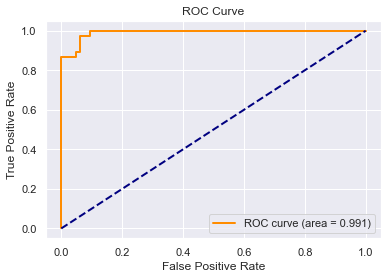

In [81]:
def plot_roc(fpr, tpr, auc, lw=2): 
   plt.plot(fpr, tpr, color='darkorange', lw=lw, 
            label='ROC curve (area = '+str(round(auc,3))+')') 
   plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
   plt.xlabel('False Positive Rate') 
   plt.ylabel('True Positive Rate') 
   plt.title('ROC Curve') 
   plt.legend(loc="lower right") 
   plt.show()

plot_roc(fprs, tprs, auc)

### Predictive Probability Threshold:

In [82]:
ppred_test = mod_age.predict(exog=body_dimensions_test)
ppred_test.head(5)

405    0.002337
430    0.034505
25     0.999987
473    0.043135
270    0.243491
dtype: float64

In [83]:
body_dimensions_test['ppred_test'] = ppred_test
body_dimensions_test.sample(5)

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex,ppred_test
485,36.9,28.5,31.5,15.6,27.8,11.6,9.8,17.2,12.9,100.0,...,23.0,34.5,32.5,21.7,14.6,27,53.6,165.1,0,0.339682
410,38.0,31.7,32.9,22.3,25.2,12.4,10.0,19.6,13.8,99.5,...,25.0,35.5,38.0,21.0,14.6,36,76.4,167.6,0,0.000568
464,37.1,27.8,31.7,20.6,26.4,12.4,10.4,18.2,13.2,99.3,...,24.9,35.5,36.3,21.4,15.3,27,62.7,167.6,0,0.077691
378,35.0,27.1,30.1,19.5,24.9,12.4,9.9,18.2,12.5,96.8,...,23.1,35.0,34.4,20.0,15.0,20,59.8,167.0,0,0.011026
82,43.0,26.5,31.6,20.6,29.5,13.4,10.4,18.8,13.6,113.2,...,26.6,36.5,35.8,21.3,16.5,25,72.7,180.6,1,0.890968


In [84]:
def tpr_fpr_thresh(y, preb_prob, thresh):
    that = 1 * (preb_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=that).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr': [tpr],
                         'fpr': [fpr]})

In [85]:
for thresh in np.arange(0,1,0.01):
    print(tpr_fpr_thresh(body_dimensions_test['sex'], body_dimensions_test['ppred_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr    fpr
0       0.01  1.0  0.625
   threshold  tpr  fpr
0       0.02  1.0  0.5
   threshold  tpr     fpr
0       0.03  1.0  0.4375
   threshold  tpr      fpr
0       0.04  1.0  0.34375
   threshold  tpr       fpr
0       0.05  1.0  0.296875
   threshold  tpr       fpr
0       0.06  1.0  0.265625
   threshold  tpr   fpr
0       0.07  1.0  0.25
   threshold  tpr       fpr
0       0.08  1.0  0.234375
   threshold  tpr       fpr
0       0.09  1.0  0.234375
   threshold  tpr       fpr
0        0.1  1.0  0.234375
   threshold  tpr      fpr
0       0.11  1.0  0.21875
   threshold  tpr      fpr
0       0.12  1.0  0.21875
   threshold  tpr       fpr
0       0.13  1.0  0.203125
   threshold  tpr       fpr
0       0.14  1.0  0.203125
   threshold  tpr       fpr
0       0.15  1.0  0.203125
   threshold  tpr       fpr
0       0.16  1.0  0.171875
   threshold  tpr      fpr
0       0.17  1.0  0.15625
   threshold  tpr      fpr
0       0.1

#### Predictive Probability Threshold Conclusion: 
It seems that the threshold = 0.25 with tpr = 1.0, fpr = 0.09375 is the most favorable choice.

In [86]:
body_dimensions_test['sexpred_test'] = 1 * (body_dimensions_test['ppred_test'] > 0.25)
body_dimensions_test.sample(5)

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex,ppred_test,sexpred_test
429,35.1,25.6,29.9,16.8,24.9,12.6,9.6,18.2,12.5,98.7,...,33.6,35.0,19.7,14.8,20,57.3,161.3,0,0.005537,0
377,35.9,25.1,28.2,18.1,26.1,11.6,8.5,16.8,11.0,98.4,...,34.2,34.0,19.8,13.8,20,58.0,162.8,0,0.000145,0
259,39.5,30.0,31.7,17.3,27.3,12.8,9.2,18.1,12.4,100.5,...,36.1,35.3,20.9,14.4,25,62.5,172.9,0,0.009042,0
137,39.4,29.7,33.1,23.0,30.4,14.2,11.6,20.4,15.0,119.4,...,38.2,36.6,22.9,18.1,45,84.5,167.6,1,0.998422,1
436,34.2,29.2,31.1,18.0,25.9,12.8,9.8,17.6,13.4,96.4,...,32.7,33.0,19.6,14.9,36,55.2,165.1,0,0.034886,0


### Confusion Matrix:

In [87]:
confusion_matrix(y_true = body_dimensions_test['sex'], y_pred = body_dimensions_test['sexpred_test'])

array([[58,  6],
       [ 0, 38]], dtype=int64)

TN (a female is predicted to be a female): 58;

FN (a male is predicted to be a female): 0;

FP (a female is predicted to be a male): 6;

TP (a male is predicted to be a male): 38

In [88]:
se = 38 / (38+0)
sp = 58 / (58+6)
fp = 1 - sp

print('Sensitivity Rate =', se)
print('Specificity Rate =', sp)
print('False Positive Rate =', fp)

Sensitivity Rate = 1.0
Specificity Rate = 0.90625
False Positive Rate = 0.09375


### Conclusion

According to the summary table, we can see that the p values for Wrist Diameter, Thigh Girth, and Chest Diameter are all 0, << any Significance Level. Such conclusion could be applied to the population - physically active people in California. As for a parsimonious model, we eliminated the predictor Age through Backward Elimination to make sure of the model simplicity and predictivity.

______
<br/><br/>

## 6. Conclusion

### Answer of each Research Question

#### **Descriptive Analytics Research Question** - What is the tendency between Wrist Diameter and Ankle Diameter under the influence of Gender?

Both the scatterplot and the summary statistics in part 2 show that there is approximately a linear relationship between wrist diameter and ankle diameter. Besides, both the wrist diameter and ankle diameter for males are bigger than that for females shown from the graph above.
<br/><br/>

#### **Inference Research Question** - What is the association between the mean wrist diameter for males and females?


At the 5% significance level, since the p-value is 1.8845660432198486e-07 which is smaller than 0.05, the evidence is sufficient to reject the null hypothesis and conclude that the mean wrist diameter of males does not equal the mean wrist diameter of females in the target population.

To answer our research question, our conclusion suggests that there is a difference between the mean wrist diameter for males and females.
<br/><br/>


#### **Linear Regression Research Question** - Is there a linear relationship between Wrist Diameter and Gender, Age, Thigh Girth, and Chest Diameter in the sample? What about in the population?

Since our Significance of Regression F test p value (6.49e-110) < alpha value(0.05), we reject the null hypothesis and conclude that none of the slope is zero in the mdoel. 

Therefore, we believe there is a linear relationship between Wrist Diameter and Gender, Age, Thigh Girth, and Chest Diameter both in the sample and the population.
<br/><br/> 

#### **Logistic Regression Research Questionn** - Is there a linear relationship between the log-odds of Gender and Wrist Diameter, Age, Thigh Girth, and Chest Diameter in the sample? What about in the population? What explanatory variables should we include in the model to build a parsimonious model?

According to the summary table, we can see that the p values for Wrist Diameter, Thigh Girth, and Chest Diameter are all 0, << any Significance Level. Such conclusion could be applied to the population - physically active people in California. As for a parsimonious model, we eliminated the predictor Age through Backward Elimination to make sure of the model simplicity and predictivity.
<br/><br/>

### Future Work


#### Questions or Analyses that our analyses may entail:

1. How should people interpret and define a dataset’s population to gain practical conclusions and insights from it?
<br/><br/>

2. Are there any other ways to find a better Predictive Threshold?
<br/><br/>

3. Are there any distinctive body dimensions that can help distinguish male citizens from female citizens or vice versa? For example, we may apply our conclusion to forensic science fields, so that they can analyze whether a piece of evidence is from either a biological male or female.